# I- Importing from Kaggle

In [2]:
! pip install kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mohamedsahraoui","key":"8add957046bf6564590d8183883ad314"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d kartik2112/fraud-detection

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

 fraud-detection.zip   fraudTrain.csv	  kaggle.json
 fraudTest.csv	      'kaggle (1).json'   sample_data


In [8]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# II- Data Understanfing

In [2]:
# Import the libraries that we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Train = pd.read_csv ('./Fraud Detection/fraudTrain.csv')
Test = pd.read_csv ('./Fraud Detection/fraudTest.csv')
data = pd.concat([Train,Test])
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data.shape

(1852394, 23)

In [4]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Visualize continuous numeric variables**


In [4]:
# create list containing non-continuous variables
other_variables = ['Unnamed: 0','trans_date_trans_time','cc_num','merchant', 'category','first', 'last', 'gender','street', 'city', 'state','zip','job', 'dob', 'trans_num', 'is_fraud']

# create list containing non-continuous variables based on the previous list
continuous_variables = [x for x in data.columns if x not in other_variables]

continuous_data = data[continuous_variables]

In [8]:
continuous_data.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01
std,1.592540e+02,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02
25%,9.640000e+00,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01
50%,4.745000e+01,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01
75%,8.310000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01


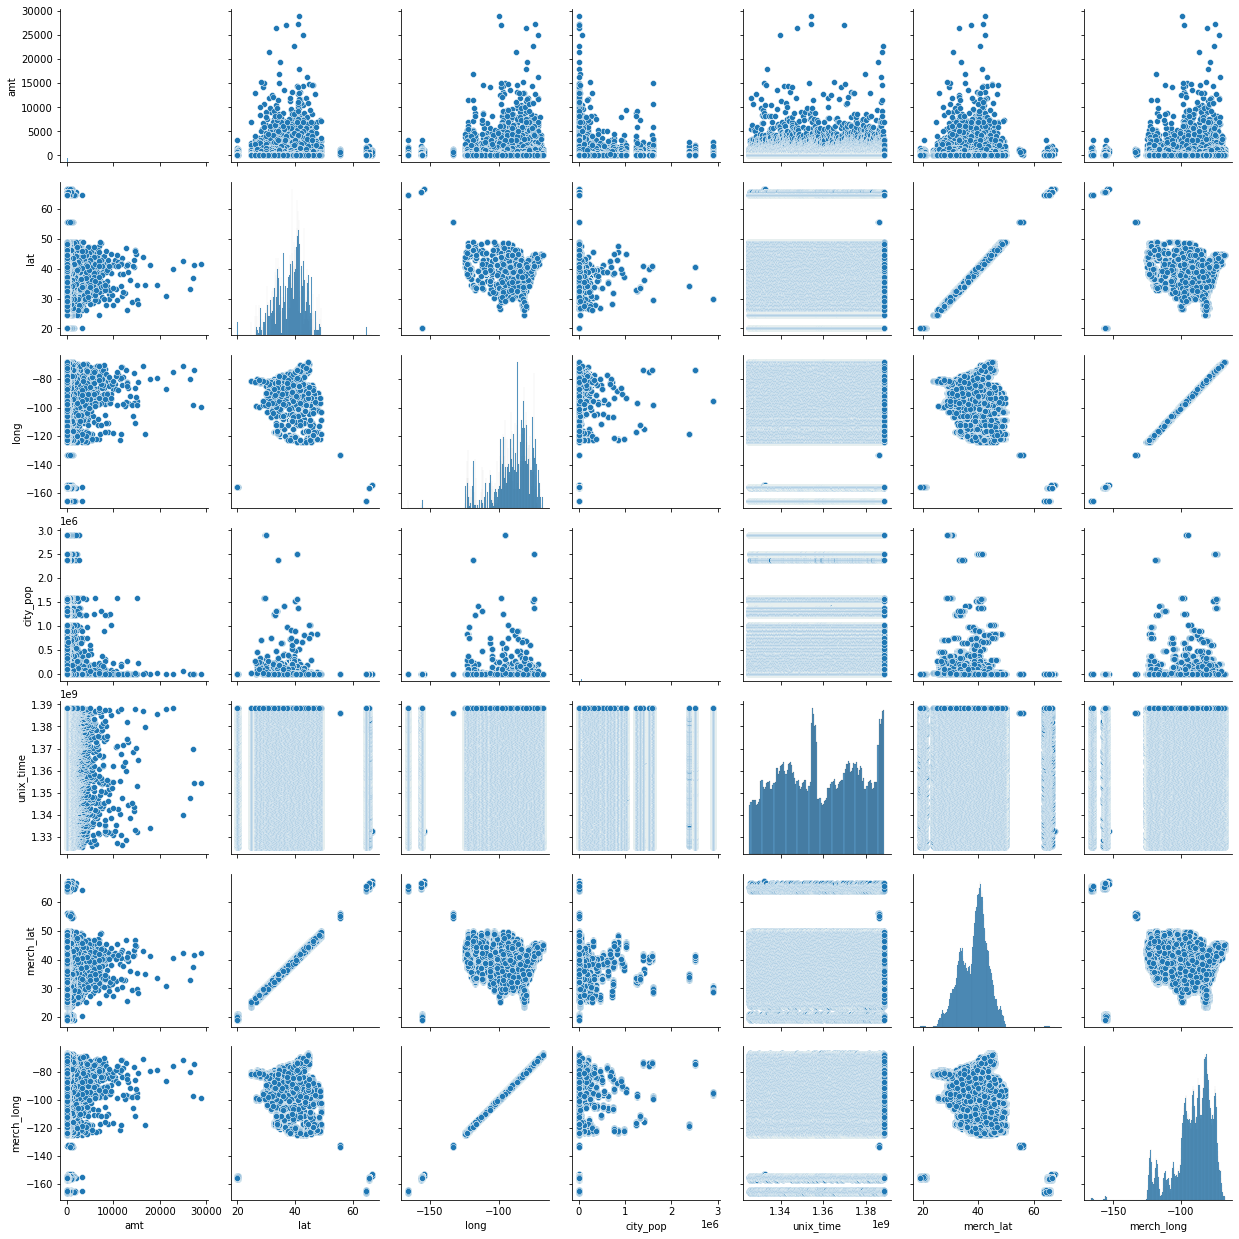

In [5]:
sns.pairplot(continuous_data)

In [6]:
corr=continuous_data.corr()
corr

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
amt,1.000000,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711
lat,-0.000670,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709
long,-0.000735,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118
city_pop,0.004921,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329
unix_time,-0.002411,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571
merch_lat,-0.000613,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554
merch_long,-0.000711,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000


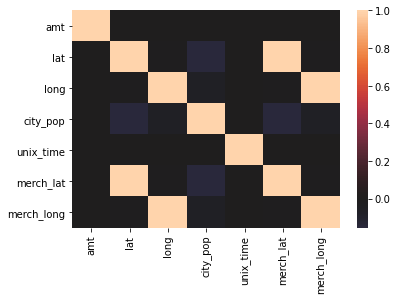

In [7]:
ax=sns.heatmap(corr, center=0)

In [8]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print(get_top_abs_correlations(continuous_data, 10))

long       merch_long    0.999118
lat        merch_lat     0.993582
           city_pop      0.154816
city_pop   merch_lat     0.153863
long       city_pop      0.052359
city_pop   merch_long    0.052329
lat        long          0.014744
           merch_long    0.014709
long       merch_lat     0.014585
merch_lat  merch_long    0.014554
dtype: float64


the highest correlated pair of variables are long and merch_long (lat and merch_lat) with correlation 0.99

/home/idriss/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amt'>

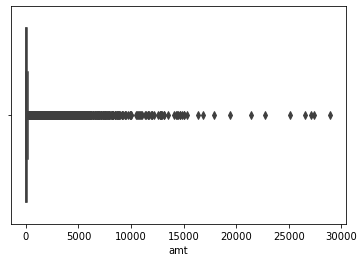

In [9]:
sns.boxplot(data['amt'])

**Visualize discrete numeric variables**

In [10]:
discrete = ['Unnamed: 0','trans_date_trans_time','cc_num', 'dob']
discrete_data = data[discrete]
discrete_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,dob
0,0,2019-01-01 00:00:18,2703186189652095,1988-03-09
1,1,2019-01-01 00:00:44,630423337322,1978-06-21
2,2,2019-01-01 00:00:51,38859492057661,1962-01-19
3,3,2019-01-01 00:01:16,3534093764340240,1967-01-12
4,4,2019-01-01 00:03:06,375534208663984,1986-03-28


**Visualize categorical variables**

In [11]:
categorical = ['merchant','category','first','last','gender','street', 'city', 'state','zip','job','trans_num','is_fraud']
categorical_data = data[categorical]
categorical_data.head()

,merchant,category,first,last,gender,street,city,state,zip,job,trans_num,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,Special educational needs teacher,1f76529f8574734946361c461b024d99,0
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,Patent attorney,6b849c168bdad6f867558c3793159a81,0
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0


<AxesSubplot:>

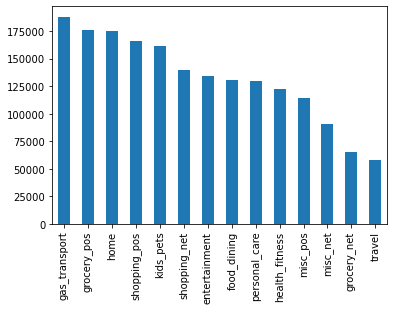

In [12]:
categorical_data['category'].value_counts().plot.bar()

<AxesSubplot:>

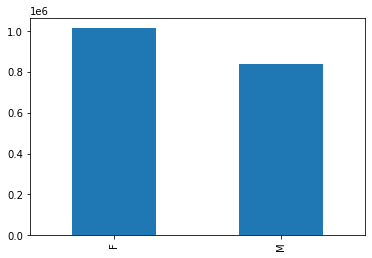

In [13]:
categorical_data['gender'].value_counts().plot.bar()

<AxesSubplot:>

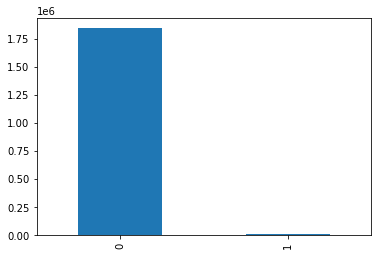

In [14]:
categorical_data['is_fraud'].value_counts().plot.bar()

# III- Data Preparation:

### 1) Data Exploration and Cleaning:

In [15]:
categorical_data[categorical] = categorical_data[categorical].astype('category')

/home/idriss/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
categorical_data.dtypes

merchant     category
category     category
first        category
last         category
gender       category
street       category
city         category
state        category
zip          category
job          category
trans_num    category
is_fraud     category
dtype: object

In [4]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### 2) Feature Selection and Engineering:

In [18]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [19]:
a = pd.DataFrame()
sale_date_df = pd.DataFrame()
a['date_time'] = data['trans_date_trans_time']
a['date'] = a['date_time'].apply(lambda x: x.split(' ')[0])
a['time'] = a['date_time'].apply(lambda x: x.split(' ')[1].replace(':',''))
a['year'] = a['date'].apply(lambda x: x.split('-')[0])
a['month'] = a['date'].apply(lambda x: x.split('-')[1])
a['day'] = a['date'].apply(lambda x: x.split('-')[2])

In [20]:
a.head()

,date_time,date,time,year,month,day
0,2019-01-01 00:00:18,2019-01-01,000018,2019,01,01
1,2019-01-01 00:00:44,2019-01-01,000044,2019,01,01
2,2019-01-01 00:00:51,2019-01-01,000051,2019,01,01
3,2019-01-01 00:01:16,2019-01-01,000116,2019,01,01
4,2019-01-01 00:03:06,2019-01-01,000306,2019,01,01


In [21]:
data['day']=a['day']
data['month']=a['month']
data['year']=a['year']
data['time']=a['time']


b = pd.DataFrame()
b['dob'] = data['dob']
b['day_dob'] = b['dob'].apply(lambda x: x.split('-')[2])
b['year_dob'] = b['dob'].apply(lambda x: x.split('-')[0])
b['month_dob'] = b['dob'].apply(lambda x: x.split('-')[1])


data['day_dob']=b['day_dob']
data['year_dob']=b['year_dob']
data['month_dob']=b['month_dob']

aa = ['month','year','time','day_dob','year_dob','month_dob']
data[aa] = data[aa].astype('int')

In [22]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,day,month,year,time,day_dob,year_dob,month_dob
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.011293,-82.048315,0,01,1,2019,18,9,1988,3
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,49.159047,-118.186462,0,01,1,2019,44,21,1978,6
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,43.150704,-112.154481,0,01,1,2019,51,19,1962,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,47.034331,-112.561071,0,01,1,2019,116,12,1967,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.674999,-78.632459,0,01,1,2019,306,28,1986,3


# Feature engineering of numeric attributes

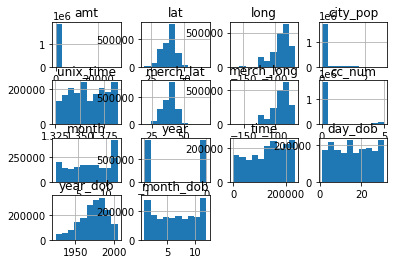

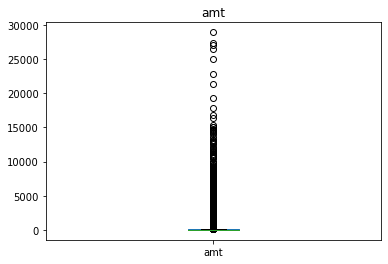

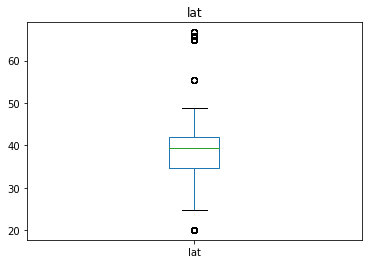

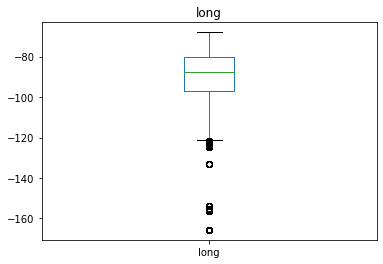

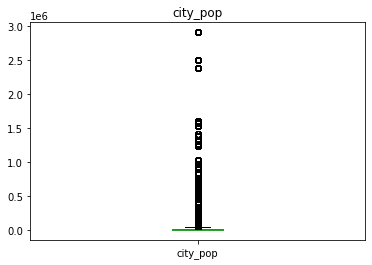

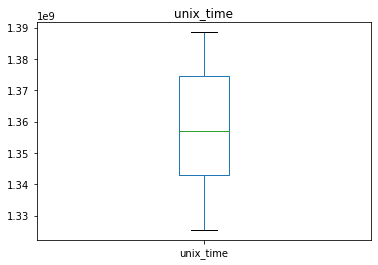

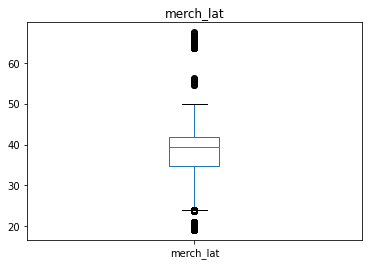

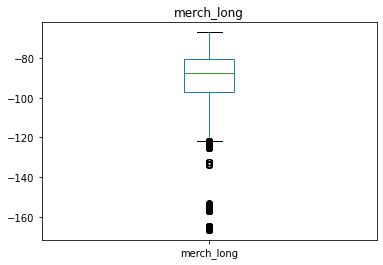

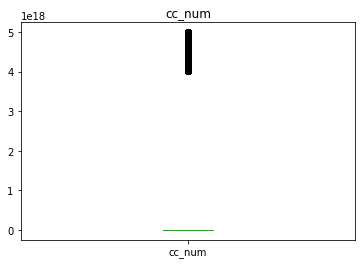

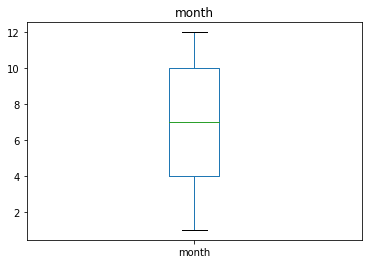

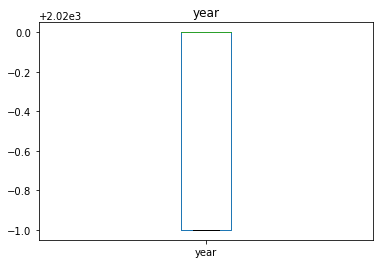

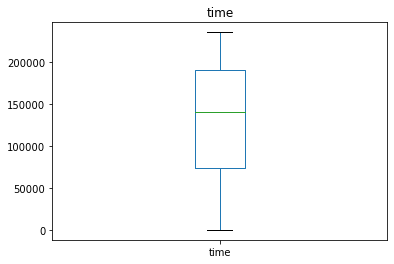

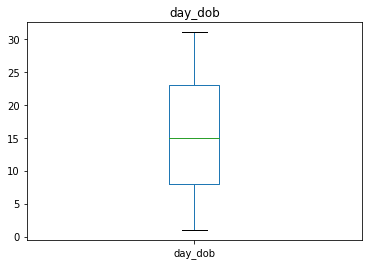

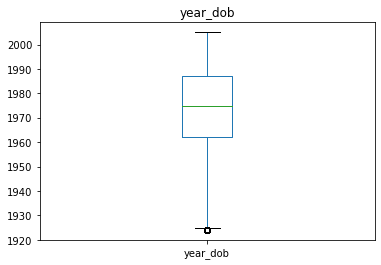

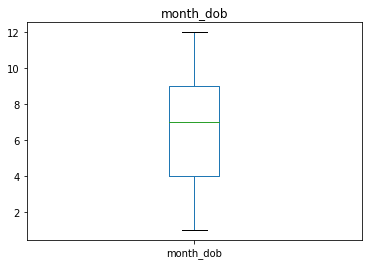

In [23]:
numeric_vars = continuous_variables + discrete[2:-1] + ['month','year','time','day_dob','year_dob','month_dob']
numeric_data = data[numeric_vars].copy()
numeric_data.shape
fig1=numeric_data.hist()
plt.show()

for x in numeric_data:
    numeric_data[x].plot.box()
    plt.title(x)
    plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
c = pd.DataFrame()

for x in numeric_vars:
    x_new = x+'_scaled'
    u = mmsc.fit_transform(data[[x]])  # this returns a 2D array with one column
    u = u.ravel()  # convert to a 1D array
    c[x_new] = u

In [25]:
c.describe()

,amt_scaled,lat_scaled,long_scaled,city_pop_scaled,unix_time_scaled,merch_lat_scaled,merch_long_scaled,cc_num_scaled,month_scaled,year_scaled,time_scaled,day_dob_scaled,year_dob_scaled,month_dob_scaled
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,2.385789e-03,3.966942e-01,7.720316e-01,3.048866e-02,5.272177e-01,4.024424e-01,7.665776e-01,8.360517e-02,5.592788e-01,5.007272e-01,5.553525e-01,4.888275e-01,6.085105e-01,5.024305e-01
std,5.501400e-03,1.086755e-01,1.406837e-01,1.037224e-01,2.880867e-01,1.053074e-01,1.379823e-01,2.622244e-01,3.113594e-01,4.999996e-01,2.889418e-01,2.962607e-01,2.146984e-01,3.089240e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.984672e-04,3.137560e-01,7.047983e-01,2.470175e-04,2.793107e-01,3.240878e-01,6.996757e-01,3.605169e-05,2.727273e-01,0.000000e+00,3.129315e-01,2.333333e-01,4.691358e-01,2.727273e-01
50%,1.604607e-03,4.141584e-01,8.001821e-01,8.325658e-04,5.021238e-01,4.195603e-01,7.945281e-01,7.053511e-04,5.454545e-01,1.000000e+00,5.969088e-01,4.666667e-01,6.296296e-01,5.454545e-01
75%,2.836130e-03,4.695754e-01,8.750773e-01,6.985640e-03,7.790809e-01,4.729269e-01,8.666856e-01,9.298624e-04,8.181818e-01,1.000000e+00,8.074538e-01,7.333333e-01,7.777778e-01,7.272727e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Feature engineering of categorical attributes

In [26]:
category_one_hot = pd.get_dummies(data.category)
gender_one_hot = pd.get_dummies(data.gender)
state_one_hot = pd.get_dummies(data.state)

df_row = pd.concat([category_one_hot, gender_one_hot, state_one_hot],axis=1) 
df_row.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = pd.concat([c,df_row],axis=1)
X = X.drop('date_time',axis=1)
X = X.drop('date',axis=1)
X = X.drop('lat_scaled',axis=1)
X = X.drop('long_scaled',axis=1)
X.head()

# IV- Modeling:

In [131]:
from sklearn.model_selection import train_test_split
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [132]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# V- Evaluation:

In [139]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.002154416170762562
Mean Squared Error: 0.0011308907919290142
Root Mean Squared Error: 0.03362871974858713


In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred.round())

0.9987313732299957